In [18]:
import pandas as pd
import numpy as np
import os
%matplotlib inline 
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report,silhouette_score

In [6]:
rcParams["figure.figsize"] =10,5
os.chdir(r'C:\Users\Vish\Documents\Data\Dataset')
df=pd.read_csv('Iris.csv')

In [7]:
df=df.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [8]:
df.drop(['Id'],axis=1,inplace=True)
data=df.drop(['Species'],axis=1)

In [9]:
data=scale(data)
data=pd.DataFrame(data,columns=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [10]:
pca = PCA(n_components=2).fit(data)
features_2d = pca.transform(data)
features_2d[0:10]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


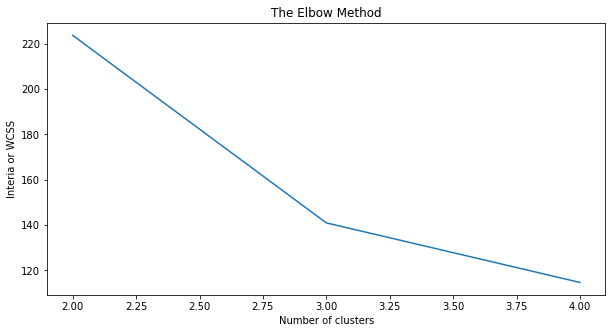

In [12]:
#Inertia is defined as the sum of distances of samples to their closest cluster center
wcss = []
for num_clusters in range(2,5):
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,5),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Interia or WCSS')
plt.show()

For no of clusters = 2  The average silhouette_score is : 0.6822257796144715
For no of clusters = 3  The average silhouette_score is : 0.495131364950329
For no of clusters = 4  The average silhouette_score is : 0.35089957710237246


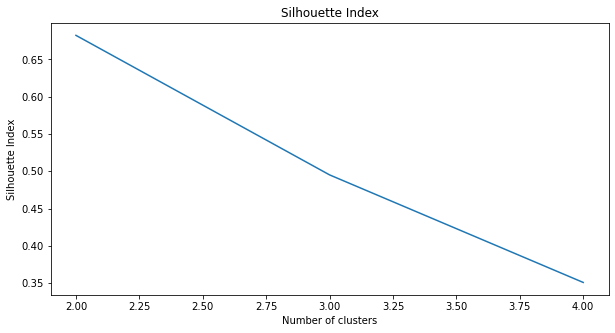

In [13]:
silhouette_index=[]
for num_clusters in range(2,5): 
    kmean = KMeans(n_clusters = num_clusters) 
    cluster_labels = kmean.fit_predict(data) 
    silhouette_avg = silhouette_score(df, cluster_labels) 
    silhouette_index.append(silhouette_avg)
    print("For no of clusters =", num_clusters, " The average silhouette_score is :", silhouette_avg) 

plt.plot(range(2,5),silhouette_index)
plt.title('Silhouette Index')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Index')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3) 
#n_clusters:int, default=8--The number of clusters to form as well as the number of centroids to generate.
#init:{‘k-means++’, ‘random’, callable, array}, default=’k-means++’--Method for initialization:
#‘k-means++’ means selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
#‘random’ means choose n_clusters observations (rows) at random from data for the initial centroids.
#If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
#If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.
#n_init:int, default=10--Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.
#max_iter:int, default=300--Maximum number of iterations of the k-means algorithm for a single run.
#tol:float, default=1e-4--Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
#precompute_distances:{‘auto’, True, False}, default=’auto’--Precompute distances (faster but takes more memory).
#‘auto’ means do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.
#True means always precompute distances. False : never precompute distances
#random_state:{int, RandomState instance, None}, default=None--Can be used for generating reproducible results.
#copy_X:bool, default=True. If True, X will be copied; else, it may be overwritten.
#n_jobs:{int, None}, default=None--The number of jobs to run in parallel
#algorithm:{“auto”, “full”, “elkan”}, default=”auto”--K-means algorithm to use. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. 
#However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters). For now “auto” chooses “elkan” but it might change in the future for a better heuristic.
kmeans.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
df['label']=kmeans.labels_
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,0
96,5.7,2.9,4.2,1.3,1,0
97,6.2,2.9,4.3,1.3,1,0
98,5.1,2.5,3.0,1.1,1,0


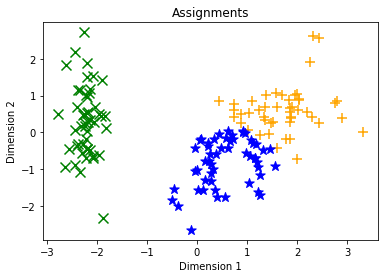

In [17]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, df['label'])